## Challenge01 - Graduate Admission Prediction

Your task is to predict Graduate Admissions for students. The application being considered is for admission to a Master’s program.

### Nomenklatur

```
| ID                  |  indeks penomoran mahasiswa
| GRE                 |  Nilai tes GRE (maks 340)
| TOEFL               |  Nilai tes TOEFL (maks 120)
| University_Rating   |  Rating universitas (maks 5)
| SOP                 |  Kualitas Statement of Purpose (maks 5)
| LOR                 |  Kualitas Surat Rekomendasi (maks 5)
| CGPA                |  IPK (maks 10)
| Research            |  0: tidak berpengalaman 
|                     |  1: berpengalaman dalam riset
| Chance_of_Admit     |  Kesempatan diterima (0 sampai 1)
```
Catatan: Nilai tes dan IPK masih dalam format lama


### Tasks
<div class="alert alert-block alert-danger">
    🚫 <b> Restriction:</b> Please refrain from using <b>ChatGPT</b> to complete this exercise, as doing so may hinder your learning experience.
</div>
Saya sudah mempersiapkan 2 file, yaitu **train.csv** dan **test.csv**
- **train.csv** berisi data yang telah dilabeli (ada `X` dan `y`)
- **test.csv** tidak memiliki label (hanya `X`)

Tugas kamu adalah untuk memprediksi `Chance_of_Admit` dari seluruh mahasiswa di **test.csv** seperti gambar di bawah ini
![Instruksi](./assets/instruksi.png)


### Submission

Hasil prediksi harus disusun dalam format sebagai berikut
```
|  ID | Chance_of_Admit |
------------------------
| 362 |   <prediksi>    |
|  74 |   <prediksi>    |
| 375 |   <prediksi>    |
| ... |   __________    |
| ... |   __________    |
```
dan di save dalam format **.csv** dengan nama file **nama__versi.csv**. Misalnya `jennie__v1.csv`.

Apabila kamu kesulitan untuk membuat format tersebut, silahkan gunakan snippet berikut


```python
def submit(model, filename="jennie__v1.csv"):
    df_submit = pd.read_csv("data/test.csv", index_col="ID")
    df_submit['Chance_of_Admit'] = model.predict(df_submit)
    df_submit[['Chance_of_Admit']].to_csv(filename, index_label='ID')
```

Kirimkan **nama__versi.csv** ke saya, via email/chat/etc.\
**Public leaderboard** akan saya update minimal 1x/hari, maklum masih hitung manual.\
**Private leaderboard** akan saya umumkan di Meet 05. Hasil tertinggi di private board akan mendapatkan sesuatu yg menarik dari saya.


### Penilaian
- Hanya **submission terakhir** yang akan digunakan untuk penilaian
- Model akan dinilai berdasarkan **R-squared**
- **Public score** hanyalah score terhadap **50% dari test.csv**
- **Private score** menggunakan **semua test.csv**

### Hint
- Lakukan submission berkali-kali dan manfaatkan hasil dari public score sebagai insight
- Jangan lupa versioning agar kamu bisa submit model terbaik di akhir
- Start with simple model. Manfaatkan workflow 4 fasa sebelum melakukan feature engineering yang lebih kompleks.
- Kamu bebas memilih besarnya test size, cross-validation fold, bahkan random state
- Kamu bebas memilih preprocessor yang akan digunakan untuk masing-masing fitur
- Kamu bebas memilih algoritma machine learning yang ingin dipakai
- Kamu bebas memilih teknik parameter search yang ingin dipakai
- Kalau ada waktu lebih, coba lakukan evaluasi seperti residual plot

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from sklearn.linear_model import ElasticNet

C:\Users\nurulhid\.conda\envs\jcopml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Import Data 

In [2]:
df = pd.read_csv("data/train.csv", index_col="ID")
display(df.head())

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
ID,,,,,,,,
250,321,111,3,3.5,4.0,8.83,1,0.77
434,316,111,4,4.0,5.0,8.54,0,0.71
20,303,102,3,3.5,3.0,8.50,0,0.62
323,314,107,2,2.5,4.0,8.27,0,0.72
333,308,106,3,3.5,2.5,8.21,1,0.75


In [3]:

X = df.drop(columns="Chance_of_Admit") ## all columns but target
y = df.Chance_of_Admit ## target data

# X_train = df.drop(columns="Chance_of_Admit") ## all columns but target
# y_train = df.Chance_of_Admit ## target data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.shape, y_train.shape

((320, 7), (320,))

In [11]:
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer([
    ("numeric", num_pipe(poly=2, transform="yeo-johnson"), ['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA']),
    ("categoric", cat_pipe(encoder='onehot'), ['Research'])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", ElasticNet())
])

model = GridSearchCV(pipeline, gsp.enet_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_)
print(model.score(X_test, y_test))

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
{'algo__alpha': 0.01, 'algo__fit_intercept': True, 'algo__l1_ratio': 0, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.8134071898191572 0.813069253353159
0.8215404330218458


C:\Users\nurulhid\.conda\envs\jcopml\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\nurulhid\.conda\envs\jcopml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e-01, tolerance: 6.607e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [12]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

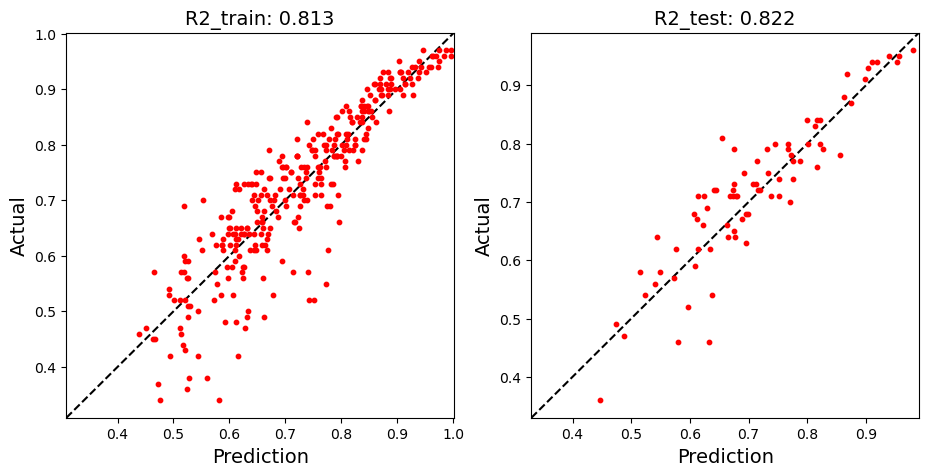

In [13]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

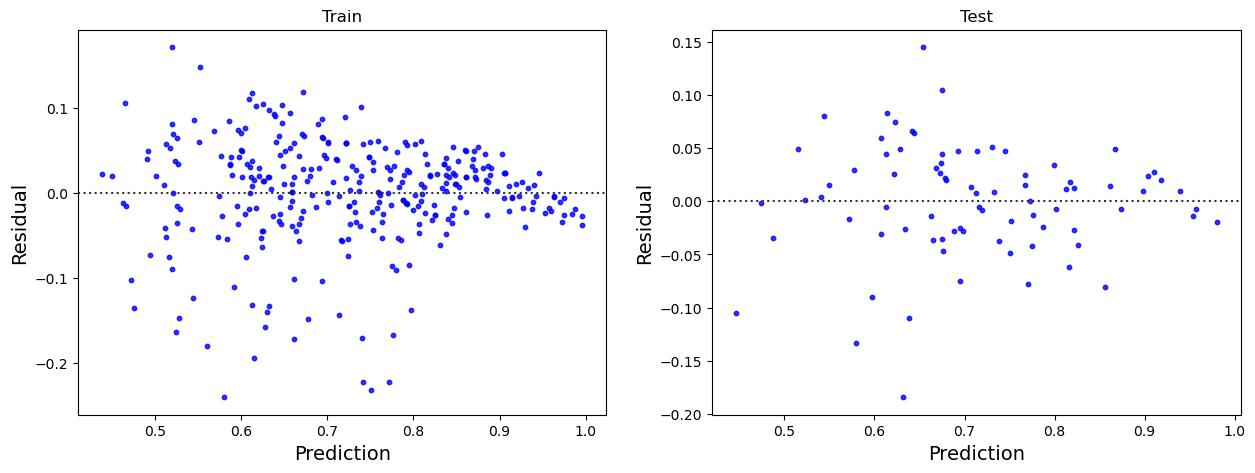

In [14]:
plot_residual(X_train, y_train, X_test, y_test, model, lowess=False)

In [16]:
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer([
    ("numeric", num_pipe(poly=2, transform="yeo-johnson"), ['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA']),
    ("categoric", cat_pipe(encoder='onehot'), ['Research'])
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", ElasticNet())
])

model = RandomizedSearchCV(pipeline, rsp.enet_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_)
print(model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'algo__alpha': 0.00034275085790758255, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.6653972633520859, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': False}
0.8134453402043886 0.812932117875496
0.8232901890415656


C:\Users\nurulhid\.conda\envs\jcopml\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [19]:
def submit(model, filename="yayat__v1011.csv"):
    df_submit = pd.read_csv("data/test.csv", index_col="ID")
    df_submit['Chance_of_Admit'] = model.predict(df_submit)
    df_submit[['Chance_of_Admit']].to_csv(filename, index_label='ID')

In [20]:
submit(model)